In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\CJ\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.isnull().sum()[train.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# EDA

In [5]:
#결측치가 많은 칼럼은 제외
train=train.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
test=test.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [6]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


* 상관관계 분석

In [7]:
#상관계수
"""
상관계수의 절대값 크기는 직선관계에 가까운 정도
부호는 직선관계의 방향
corr>0 : 점들이 우상향방향으로 띠를 형성, 직선 기울기 양수
corr<0 : 점들이 우하향방향으로 띠를 형성, 직선 기울기 음수

|상관계수|
0.7이상 : 상관관계가 매우 강함
0.3~0.7 : 상관관계가 있음
0.1~0.3 : 매우 약한 상관관계가 있음
0~0.1 : 무상관, 상관관계가 없다
"""

#자료형태 : 양적/질적 자료
"""
양적 자료 : 수치형자료 => 연속형, 이산형 자료로 구분
질적 자료 : 범주형 자료 => 명목형, 순수형 자료로 구분

1) 수치형
연속형? 값이 끊어지지 않고 연속적으로 이어지는 자료(키, 몸무게)
이산형? 정수로 나누어지는 자료(수술 횟수 등)

2) 범주형
명목형? 범주들 간에 순서적인 의미가 없는 자료(혈액형 등)
순서형? 범주들 간에 순서가 의미가 있는 자료(학점, 평가 등)
"""

#상관계수는 자료 형태에 따라 종류가 나누어짐
"""
1) 피어슨 상관계수(모수적 방법) : 연속형 & 연속형 상관계수
    - 두 변수가 모두 정규성을 따른다는 가정이 필요(모수적 방법) 
    - 대부분 사용되는 상관계수
    
2) 스피어만 상관계수(비모수적 방법)

3) 파이계수 : 명목형(이산형) & 명목형(이산형)
    - 두 변수가 모두 binary일 때 두 변수간의 상관계수
    
**모수? 모집답 통계치(평균, 표준편차, 분산 등)**
**모수적 방법? 표본의 크기가 충분히 크고 정규분포를 따를때, 모집단에서 표본을 추출하여 통계 ex)피어슨상관분석
**중심극한정리? 표본의 크기가 커질수록(30개 이상), 표본 평균들이 이루는 분포는 모집단의 평균과 모집단의 표준편차가 정규분포에 가까워진다는 정리
**표본평균분포? 모집답에서 표본크기가 n(30개 이상)인 표본을 여러 번 추출(예: 100번 추출) 했을때 각 표본 평균들이 이루는 분포

**비모수적방법? ex) 스피어만 상관분석, 켄달 
    - 정규분포를 따르지 않는다고 증명 or 표본이 (30개 미만, 10개미만) 소규모인 경우에는 정규분포임을 가정할 수 없을 때 비모수적 방법을 사용.
    - 자료를 크기 순으로 배열 -> 순위(서열) 매김 -> 순위 합계를 구해서 합계간의 차이를 비교

"""

#척도? 변수 값을 표현하는 수준
"""
명명척도 : 연산이 불가능한 것 ex)혈액형
서열척도 : 순서형 ex)직급, 학점
등간척도 : 간격이 일정한 순서형. 연산가능 ex) 나이대
"""

'\n명명척도 : 연산이 불가능한 것 ex)혈액형\n서열척도 : 순서형 ex)직급, 학점\n등간척도 : 간격이 일정한 순서형. 연산가능 ex) 나이대\n'

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5]),
 [Text(0.5, 0, 'Id'),
  Text(1.5, 0, 'MSSubClass'),
  Text(2.5, 0, 'LotFrontage'),
  Text(3.5, 0, 'LotArea'),
  Text(4.5, 0, 'OverallQual'),
  Text(5.5, 0, 'OverallCond'),
  Text(6.5, 0, 'YearBuilt'),
  Text(7.5, 0, 'YearRemodAdd'),
  Text(8.5, 0, 'MasVnrArea'),
  Text(9.5, 0, 'BsmtFinSF1'),
  Text(10.5, 0, 'BsmtFinSF2'),
  Text(11.5, 0, 'BsmtUnfSF'),
  Text(12.5, 0, 'TotalBsmtSF'),
  Text(13.5, 0, '1stFlrSF'),
  Text(14.5, 0, '2ndFlrSF'),
  Text(15.5, 0, 'LowQualFinSF'),
  Text(16.5, 0, 'GrLivArea'),
  Text(17.5, 0, 'BsmtFullBath'),
  Text(18.5, 0, 'BsmtHalfBath'),
  Text(19.5, 0, 'FullBath'),
  Text(20.5, 0, 'HalfBath'),
  Text(21.5, 0, 'BedroomAbvGr'),
  Text(22.5, 0, 'KitchenAbvGr'),
  Text(23.5, 0, 'TotRmsAbvGrd'),
  Text(2

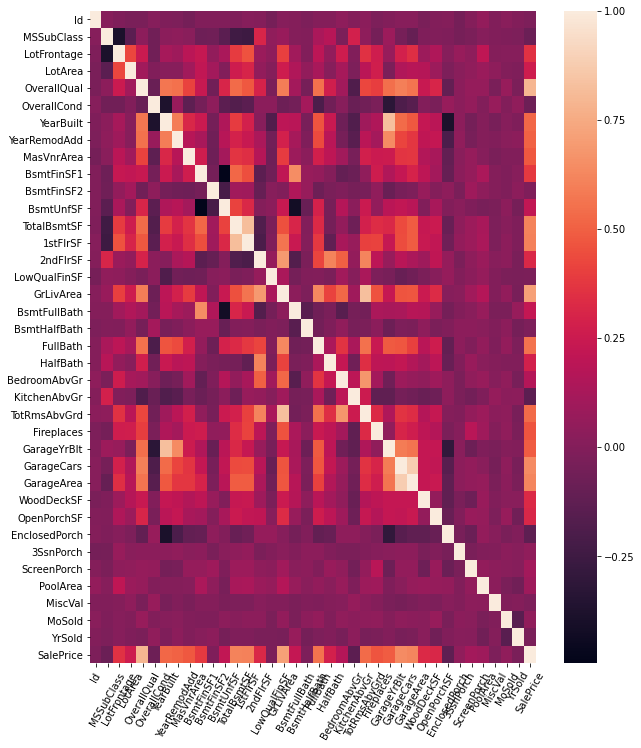

In [8]:
plt.figure(figsize = (10, 12))
sns.heatmap(train.corr())
plt.xticks(rotation=60)

In [9]:
train.corr().SalePrice

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [10]:
#SalePrice값을 기준으로 내림차순 정렬하고 가장 큰 값에 해당하는 상위 10개를 추출(본인제외)
train.corr().SalePrice.sort_values(ascending = False)[1:11]
train.corr().SalePrice[np.argsort(-train.corr().SalePrice)][1:11]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

<AxesSubplot:>

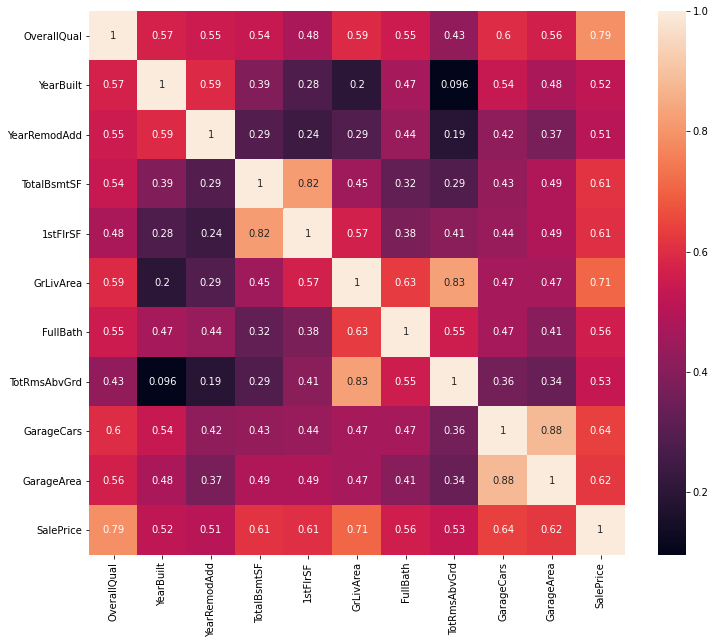

In [11]:
#각 컬럼과 salesprice컬럼간의 상관계수가 0.5보다 큰 데이터에 대해 히트맵으로 출력
rev = train.corr().SalePrice[abs(train.corr().SalePrice)>0.5]
rev_cols = list(rev.index.values)

plt.figure(figsize = (12, 10))
sns.heatmap(train[rev_cols].corr(), annot=True)

# Feature Selection

In [15]:
train = train[rev_cols]
train

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125


In [17]:
x = train[rev_cols[:-1]].values #SalePrice를 제외한 나머지 칼럼
y = train.iloc[:, -1].values #SalePrice 칼럼

Train, Test 데이터 나누기

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((1168, 10), (1168,), (292, 10), (292,))

# 모델링

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
model = RandomForestRegressor(n_estimators=300, random_state=0)
model.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=300, random_state=0)

In [25]:
#성능평가 : score
model.score(xtrain, ytrain)

0.9769987133158753

In [26]:
#예측
ypred = model.predict(xtest)

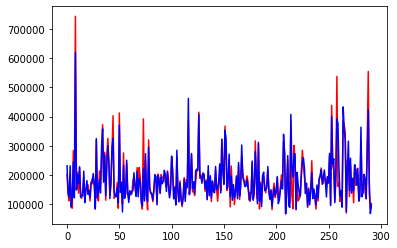

In [28]:
#TEST데이터의 예측값과 실제 값을 비교해보자
plt.plot(ytest, color='red')
plt.plot(ypred, color='blue')

In [ ]:
# 제출(엑셀파일로 저장하여 캐글에 저장)